In [1]:
import os 
import time
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm  

%matplotlib inline



In [3]:
# Adjust Plot size
fig_size = plt.rcParams["figure.figsize"] # get current plot size
print("Default plot size:", fig_size) # # print current plot size
fig_size[0] = 15 # set x value of plot size 
fig_size[1] = 10  # set y value of plot size 
plt.rcParams["figure.figsize"] = fig_size # set new plot size
print("New plot size:", fig_size) # # print current plot size

Default plot size: [15.0, 10.0]
New plot size: [15, 10]


In [4]:
# load cleaned data set

# load dataframe
data = pd.read_pickle(path="../data/interim/01_coffee.pkl")


# Load coffee types dictionary 
type_dict = np.load('../data/interim/cfe_Type_dict.npy').item()
type_dict

{'Jacobs Classic': 0,
 'San Fabio Ungesüsst': 1,
 'Krüger Chai latte Ingwer-Zitronengras': 2,
 'Krüger Chai latte Honig': 3,
 'Krüger Chai latte Classic India': 4,
 'Krüger Chai latte Sweet India': 5,
 'Bellarom Latte Macchiato': 6,
 'Tee Heidelbeere Vanille': 7,
 'Tee Minze-Zitrone': 8,
 'Tee Apfel': 9,
 'Tee Grüner Tee': 10,
 'Maxima Cappucino Vanille': 11,
 'Tee Ostfriesen Schwarzer Tee': 12,
 'Automat Cappucino': 13,
 'Tee Green Tea': 14,
 'Tee Blutorange': 15,
 'Tee Pfefferminze': 16,
 'Tee Ingwer Zitrone': 17,
 'Krüger Eiskaffee': 18,
 'Bellarom Cappucino Caramello': 19,
 'Automat Kaffee': 20,
 'Melitta Classico': 21,
 'Rondo Cappucino': 22,
 'Di Carlo Classico': 23,
 'Krüger White-Vanille': 24,
 'Krüger Karamell-Krokant': 25,
 'Krüger Classico': 26,
 'Jacobs Gold': 27,
 'Magico Cappucino Weniger Suess': 28,
 'Cafét Arrabiata': 29,
 'Jacobs Krönung': 30,
 'Melitta Kaffee': 31,
 'Rondo Kaffee': 32,
 'Immergut Eiscafe': 33,
 'Eduscho Gala Nr.1 Kaffee': 34,
 'Krüger Chai latte Kokos

In [5]:
# Verify meta data to ensure correct data set

### from 01_GetTheData ###
###    Features(3): ['Date', 'Type', 'Weekday']
###    Rows: 231 entries
###    Time span of observations: from 2016-03-21 09:23:00 to 2016-11-11 14:44:42
###    Types of coffee: 6


features = data.columns.tolist()
instances = data.index.size 
timeSpan = [data.Date.min(), data.Date.max()]
types_amount = len(data.Type.unique())

print("Features({0}): {1}".format(len(features),features))
print("Rows: {0} entries".format(instances))
print("Time span of observations: from {0} to {1}".format(timeSpan[0], timeSpan[1]))
print("Types of coffee: {0}".format(types_amount))

Features(3): ['Date', 'Type', 'Weekday']
Rows: 1098 entries
Time span of observations: from 2016-03-21 09:23:00 to 2019-01-11 14:06:29
Types of coffee: 38


Values:
3    240
2    235
1    228
0    205
4    189
6      1
Name: Weekday, dtype: int64


Text(0.5,0,'Weekday(0=Monday,..,6=Sunday)')

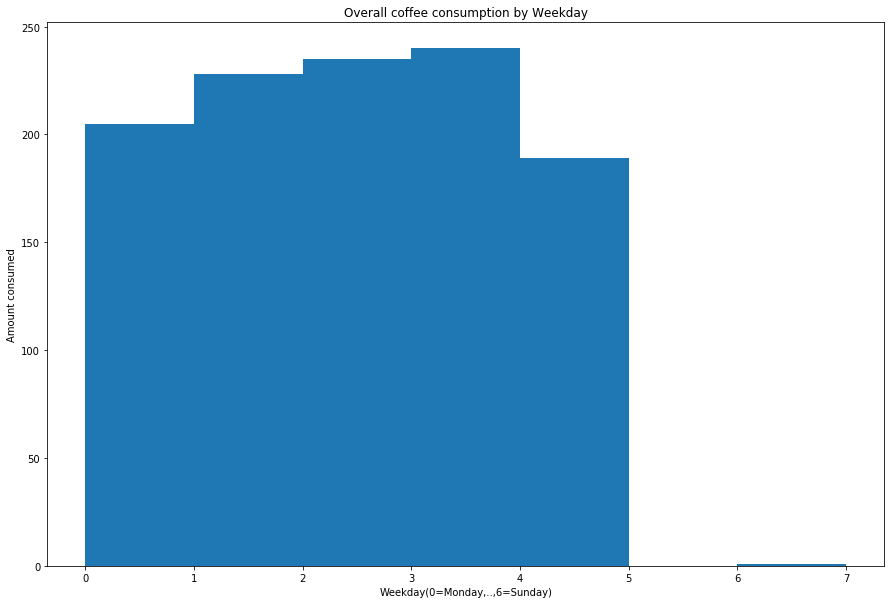

In [6]:
# draw historgramm amount by weekday
print("Values:\n{0}".format(data.Weekday.value_counts()))
plt.hist(x=data.Weekday, bins=[0,1,2,3,4,5,6,7])
plt.title('Overall coffee consumption by Weekday')
plt.ylabel('Amount consumed')
plt.xlabel('Weekday(0=Monday,..,6=Sunday)')


Text(0.5,0,'Amount consumed')

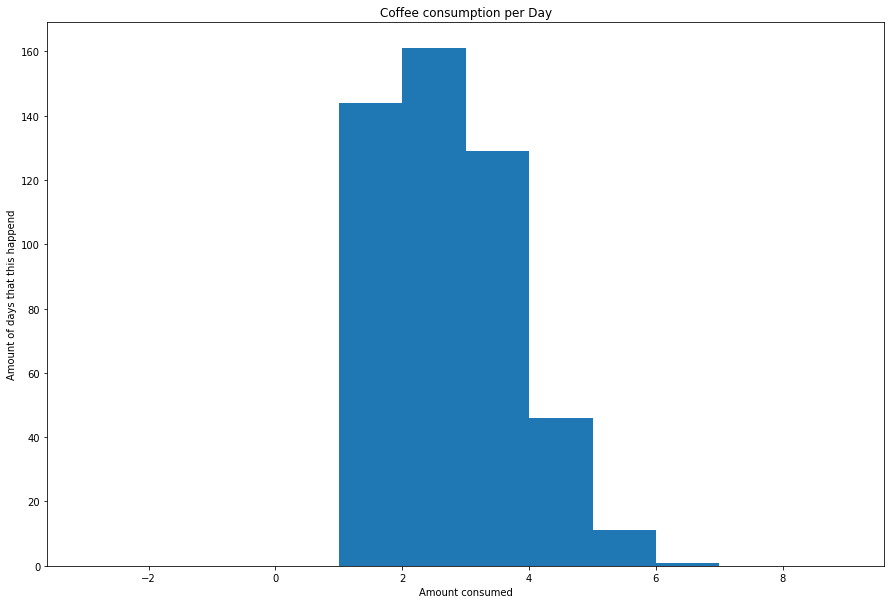

In [7]:
# group and display per day consumption
perDayConsumption = data.Date.dt.date.value_counts()
perDayConsumption = perDayConsumption.sort_index()

plt.hist(x=perDayConsumption, bins=[-3,-2,-1,0,1,2,3,4,5,6,7,8,9])
plt.title('Coffee consumption per Day')
plt.ylabel('Amount of days that this happend')
plt.xlabel('Amount consumed')


In [8]:
mean_consumption = perDayConsumption.sum()/len(perDayConsumption)  # perDayConsumption.mean()
std_consumption = np.sqrt((perDayConsumption - mean_consumption).dot(perDayConsumption - mean_consumption)/(len(perDayConsumption)-1))# perDayConsumption.std()

# Z-scores
# negative valus lower than the mean, positive are greater
zScores = (perDayConsumption - mean_consumption)/std_consumption

print("Amount of days (N): ", len(perDayConsumption))
print("Average consumption per day: ",mean_consumption)
print("Standard deviation in consumption: ",std_consumption)
print("Zscores: {0} under mean  && {1} over mean".format(len(zScores[zScores < 0]),len(zScores[zScores >= 0])));

Amount of days (N):  492
Average consumption per day:  2.23170731707
Standard deviation in consumption:  1.05412135191
Zscores: 305 under mean  && 187 over mean


In [9]:
# normal distribution assumption: probability of specific consumption
normDist = 1/(std_consumption * np.sqrt(2*np.pi)) * np.exp((-1/2) * np.power(zScores,2))
prob = pd.concat([perDayConsumption,normDist],axis=1 )
prob.columns = ['Consumption', 'Probability']

print("Overall probability for all events: {0}%".format(prob.drop_duplicates().Probability.sum()*100))
prob.drop_duplicates().sort_values('Consumption') # display probabilites of coffee consumption 

Overall probability for all events: 95.61753220080796%


,Consumption,Probability
2016-03-23,1,0.191225
2016-03-21,2,0.369426
2016-04-07,3,0.290180
2016-03-30,4,0.092675
2017-02-23,5,0.012034
2018-01-29,6,0.000635


In [ ]:
### ToDo:
# Add missing weekdays (days where no coffee was consumed results in no record. Therefore, the day is missing. Ignore Weekends)
# Look how distribution and probablities change with included missing weekdays (consumption=0)
# Correlation between time spent working and amount of coffee consumed? (e.g. the longer he works the more he consumes)
# scatter plot for coffee consumption based on hour of day (is there a correlation? cluster?)

In [ ]:
test = pd.DataFrame(data)
test.index = pd.to_datetime(test.Date, format="%Y-%m%d")
test.resample("D",).mean().fillna(-1)